# **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 15.2 MB/s eta 0:00:00


# **Import all necessary Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **Download Dataset From Roboflow**

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="iVPCfLxhPNS0A5NEjugk")
project = rf.workspace("angelena-j6bge").project("dataset2.0-crzmc")
version = project.version(3)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset2.0-3 in yolov11:: 100%|██████████| 4850/4850 [00:01<00:00, 4502.21it/s]


# **Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/dataset2.0-3/data.yaml epochs=100 imgsz=640 batch=16 plots=True patience=10

100% 18.4M/18.4M [00:00<00:00, 153MB/s]
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/dataset2.0-3/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

# **View Training Results**

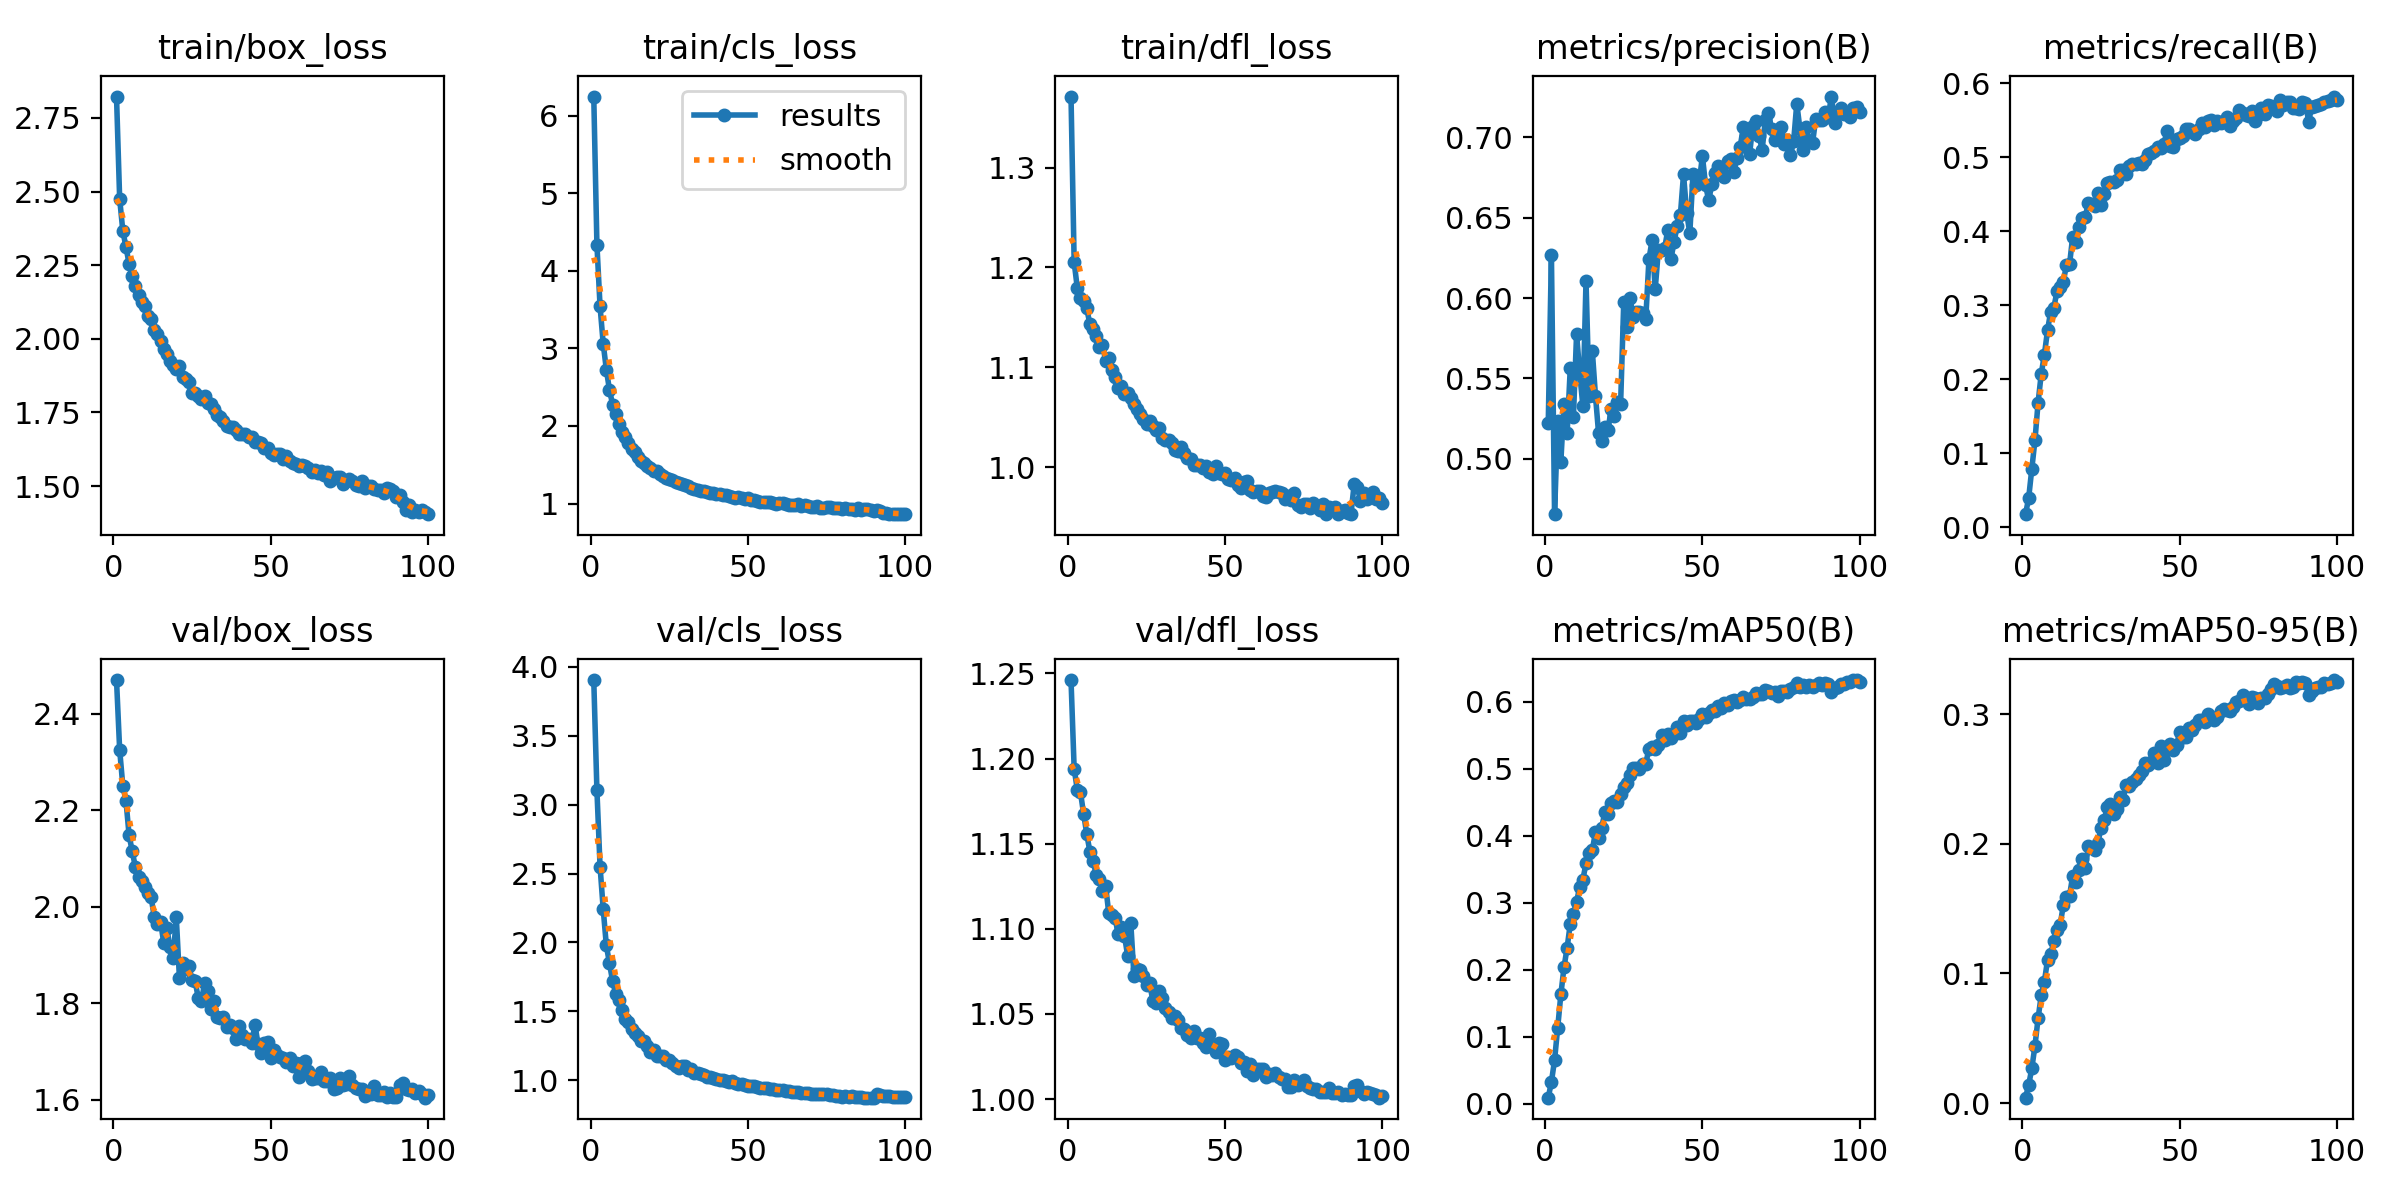

In [ ]:
display(Image(filename='/content/runs/detect/train/results.png', width=600))

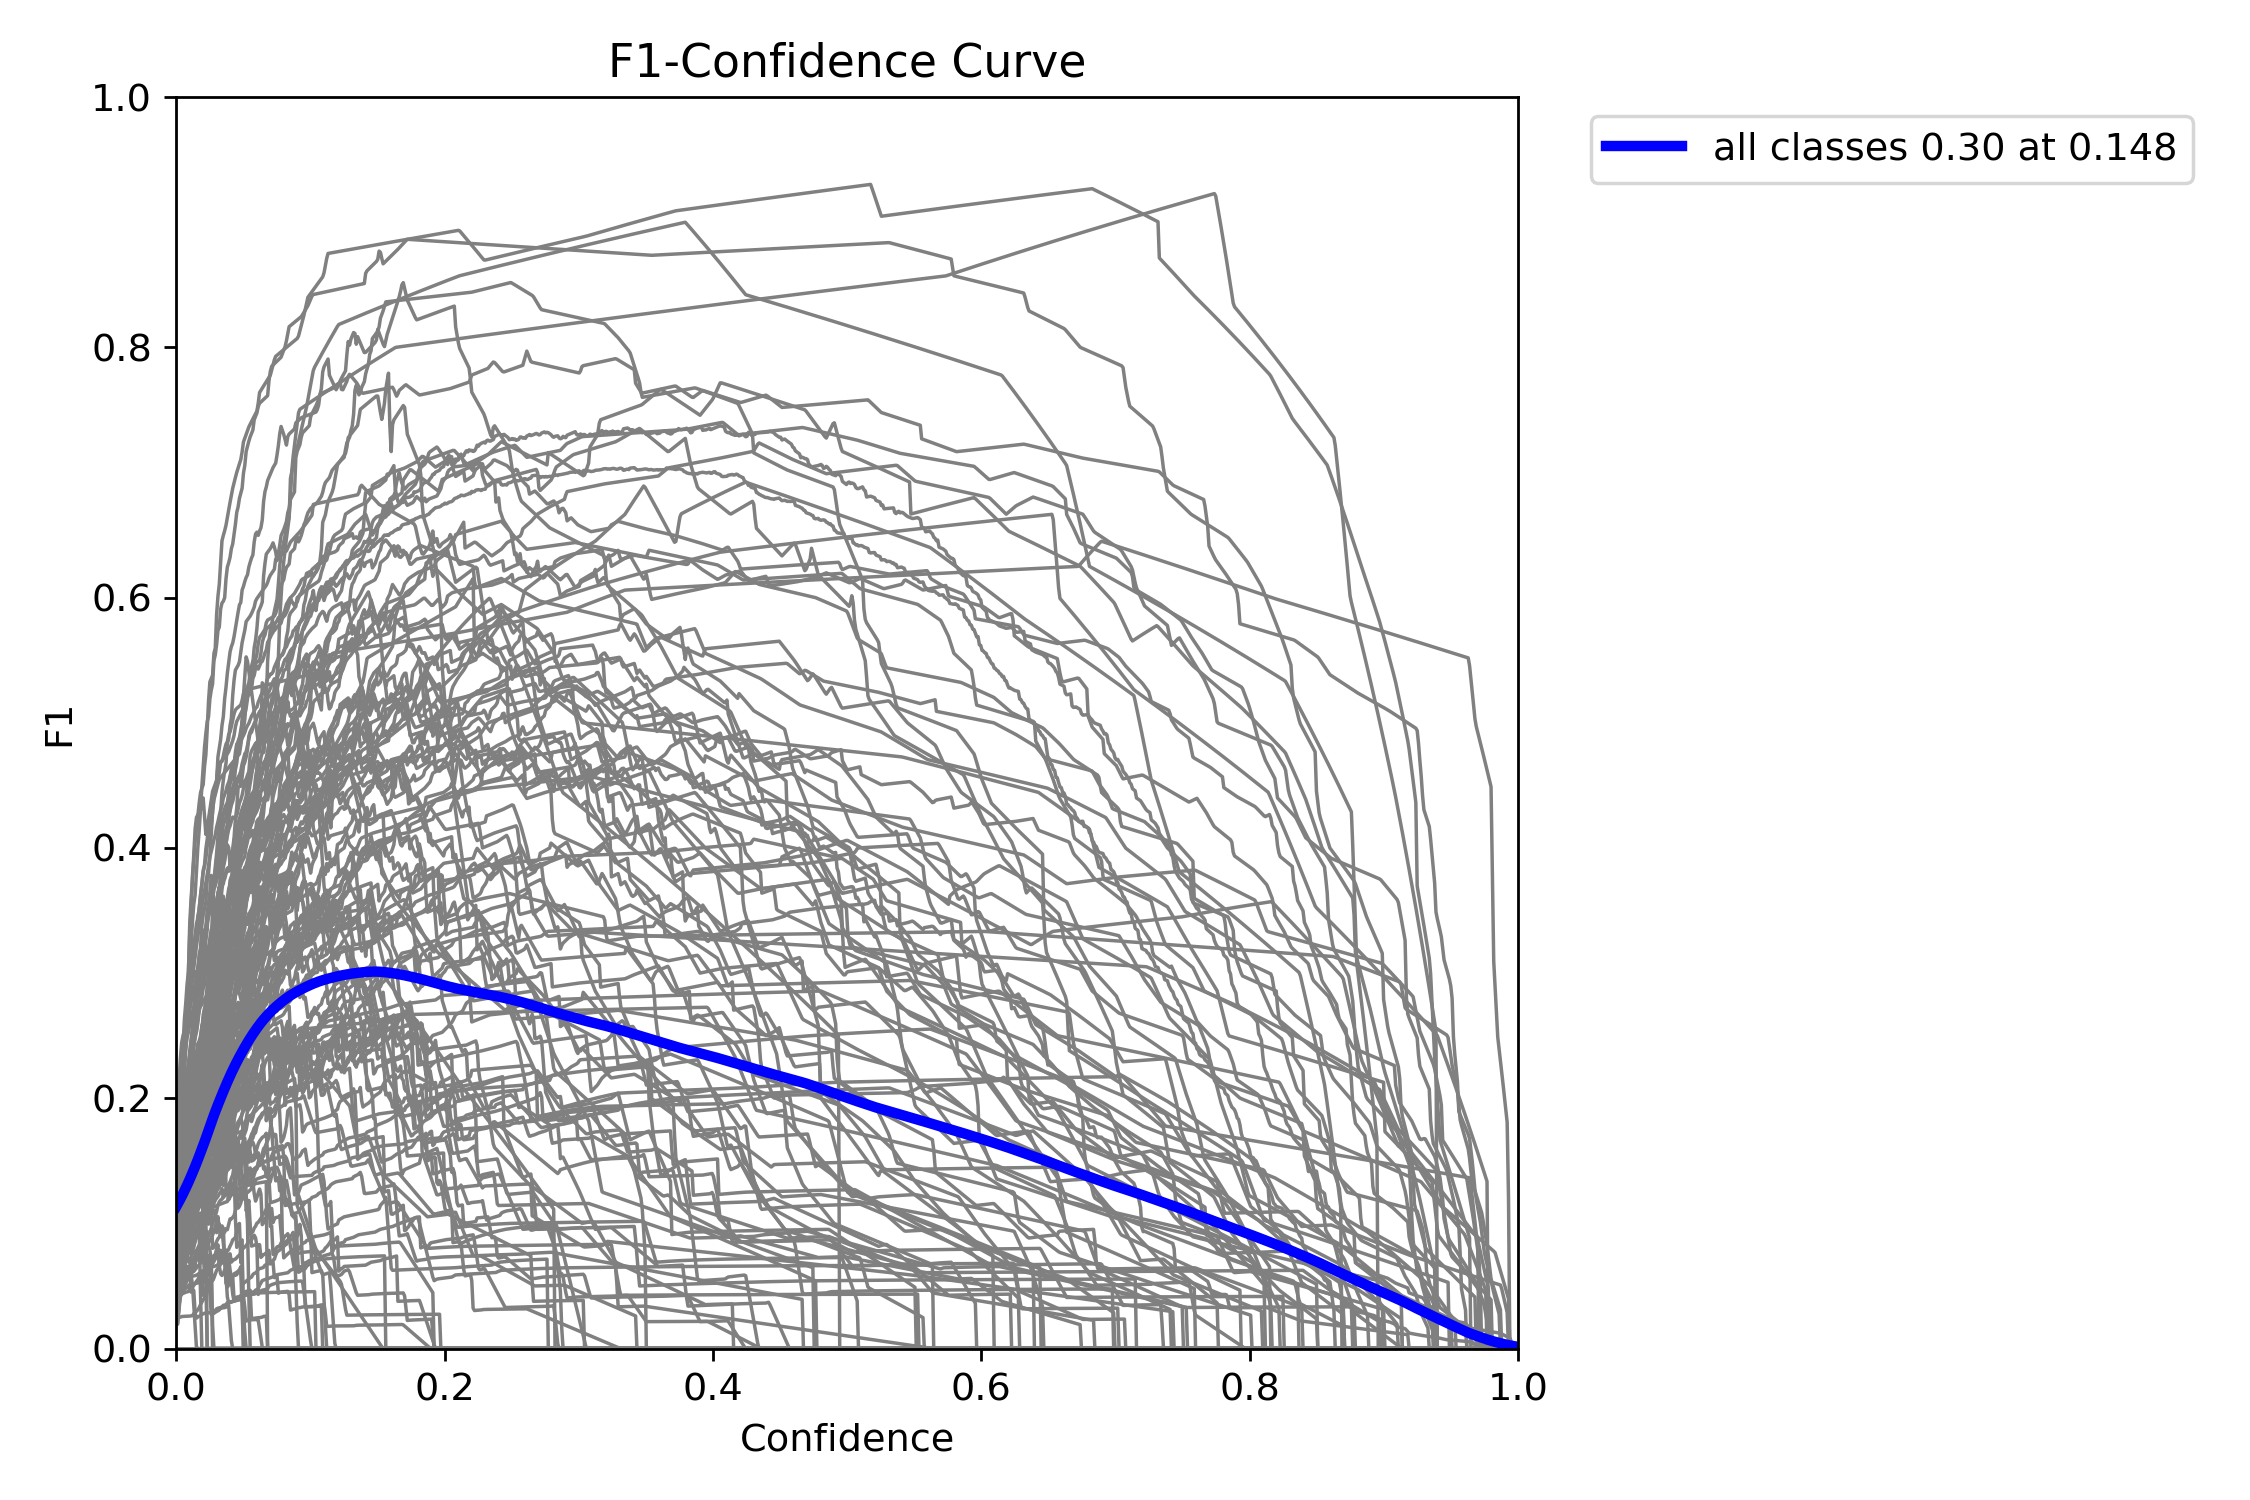

In [ ]:
display(Image(filename='/content/runs/detect/train/F1_curve.png', width=600))

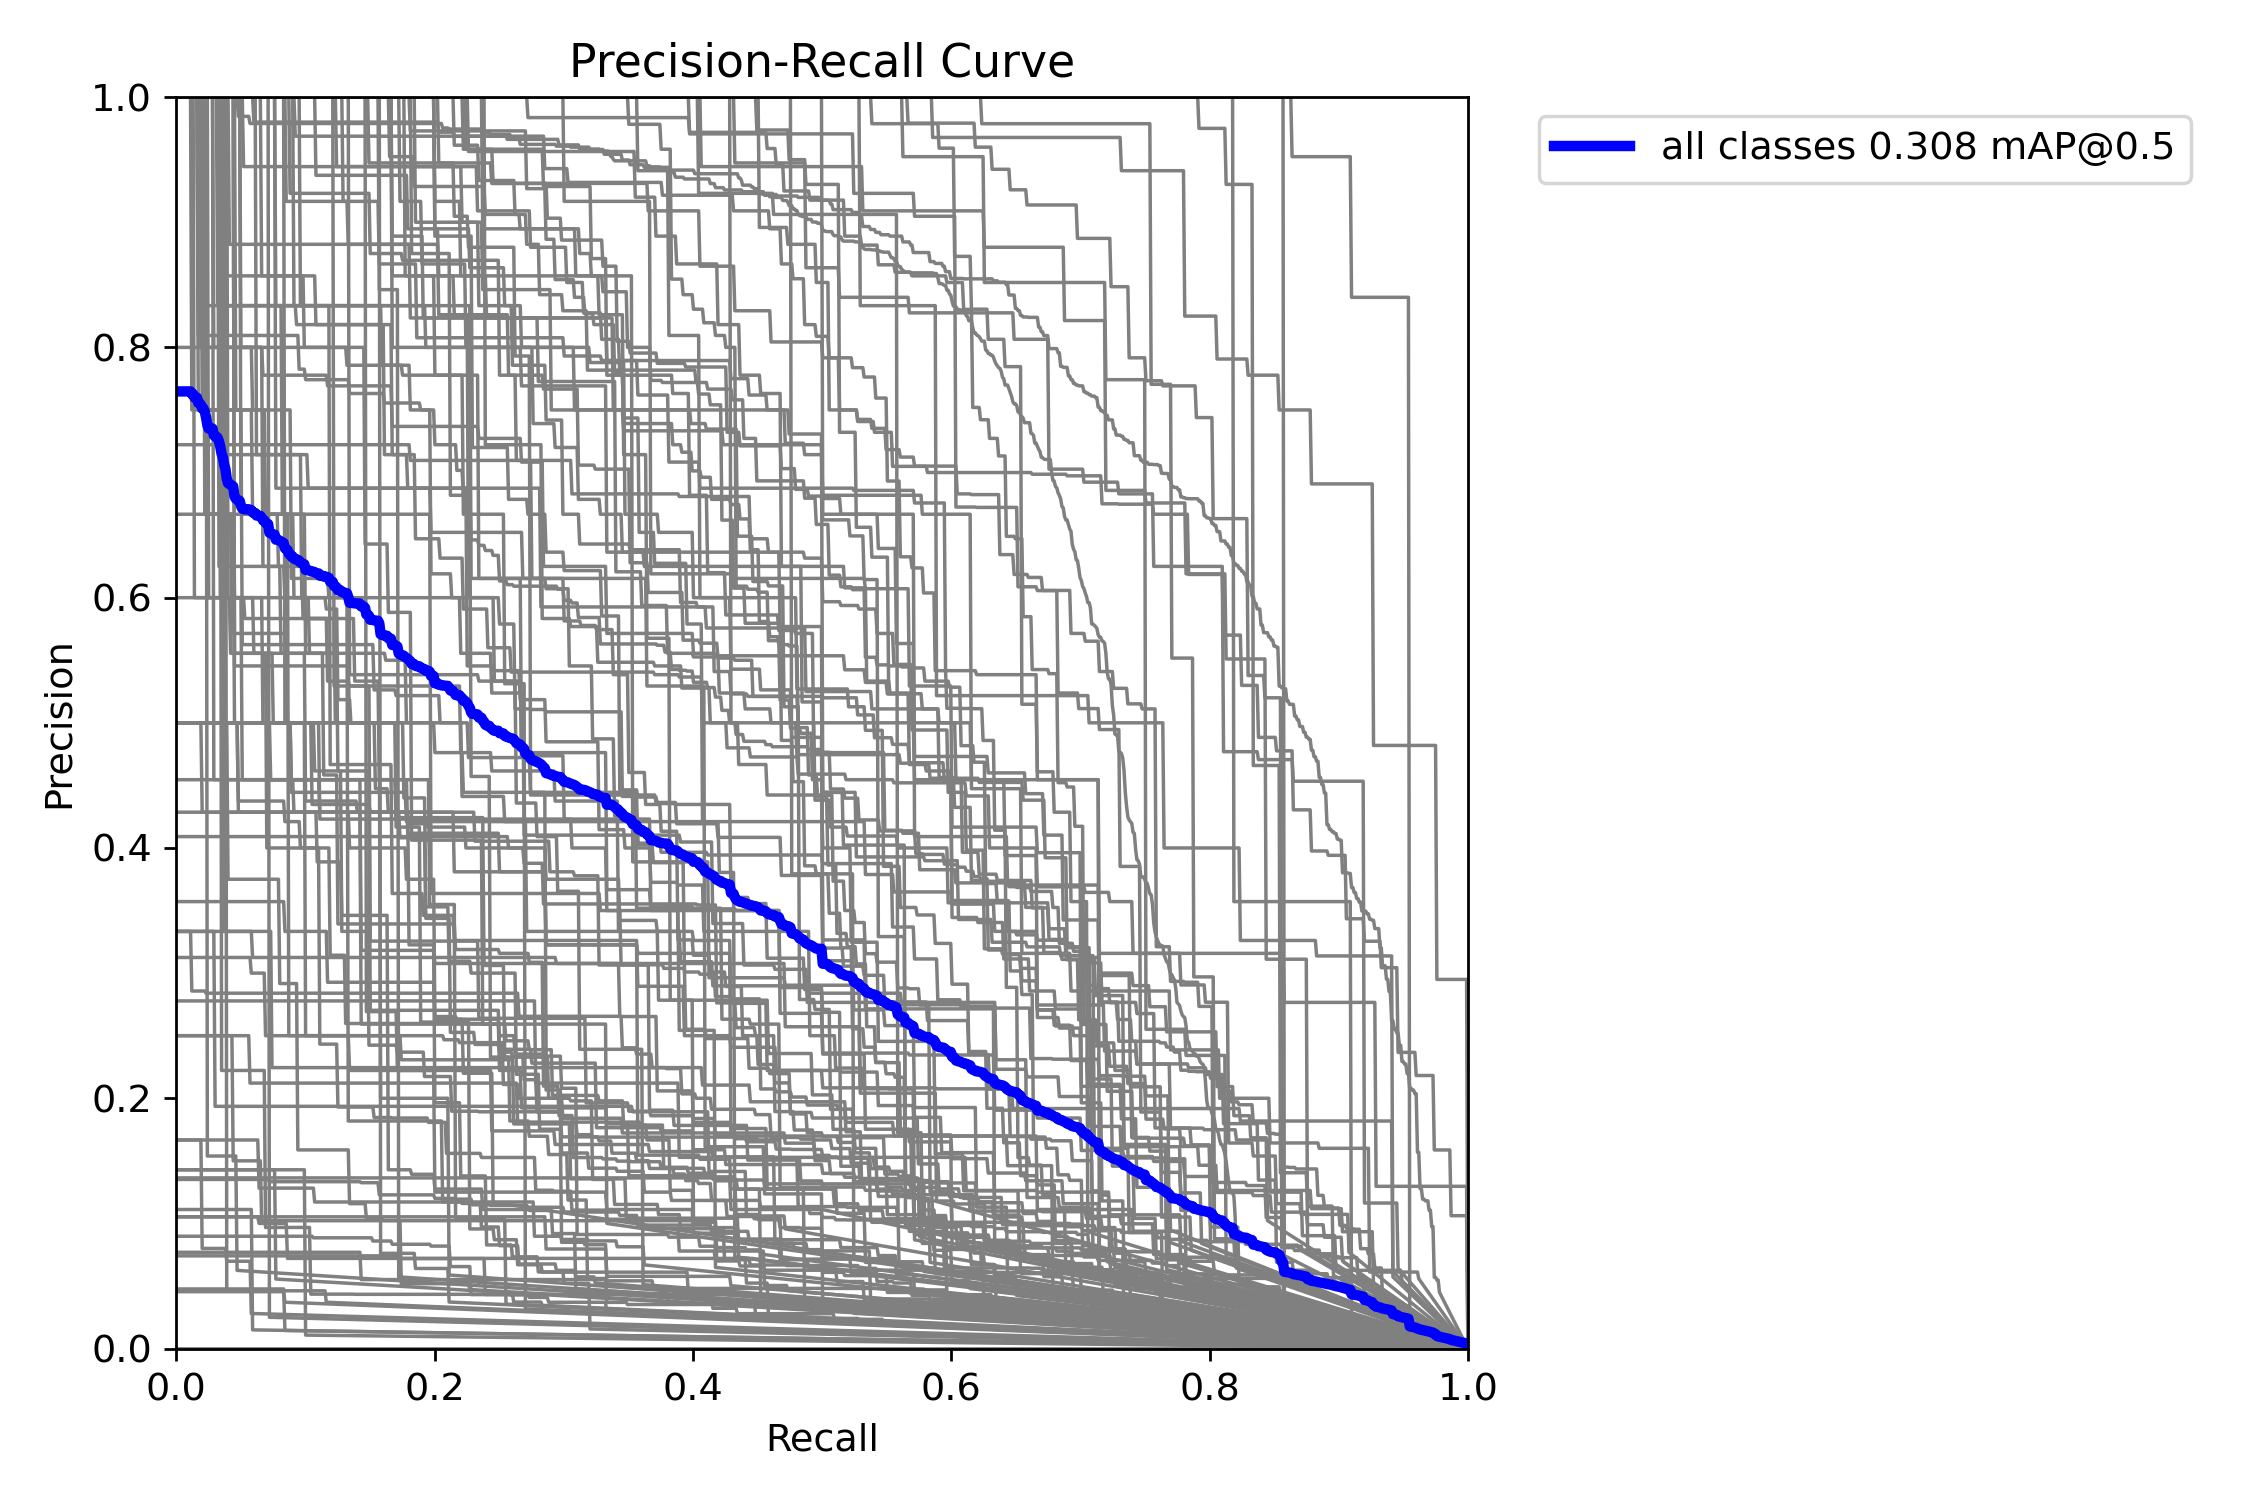

In [ ]:
display(Image(filename='/content/runs/detect/train/PR_curve.png', width=600))

### **Validate fine-tuned model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/dataset2.0-3/data.yaml

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,472,398 parameters, 0 gradients, 21.6 GFLOPs
val: Scanning /content/dataset2.0-3/valid/labels.cache... 479 images, 0 backgrounds, 0 corrupt: 100% 479/479 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 30/30 [00:09<00:00,  3.02it/s]
                   all        479       8691      0.718      0.584      0.634      0.328
              baseball          9         22      0.887      0.955       0.97      0.398
               block25         12         12      0.932     0.0833     0.0973     0.0389
               block50         18         19          1          0          0          0
               block75          9          9          1          0          0          0
                id_001         21         21      0.954      0.524      0.545      0.413
                id_002         22         22    

# **Inference with custom model**

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/dataset2.0-3/test/images save=True

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,472,398 parameters, 0 gradients, 21.6 GFLOPs

image 1/256 /content/dataset2.0-3/test/images/Drone_004-mp4_t-10-5_jpg.rf.0f6a85122c10c2aa05c8669a4e913f13.jpg: 640x640 2 stands, 16.0ms
image 2/256 /content/dataset2.0-3/test/images/Drone_004-mp4_t-100-333333_jpg.rf.8db4dd49ee2d0adf2d71c5a9b1c8ed7b.jpg: 640x640 1 walk, 16.0ms
image 3/256 /content/dataset2.0-3/test/images/Drone_004-mp4_t-103-166667_jpg.rf.dd25c78d98b41a09dba084c955bdab88.jpg: 640x640 1 walk, 16.3ms
image 4/256 /content/dataset2.0-3/test/images/Drone_004-mp4_t-103-333333_jpg.rf.063c97a217c07ccf1ecf330085b994aa.jpg: 640x640 1 walk, 15.9ms
image 5/256 /content/dataset2.0-3/test/images/Drone_004-mp4_t-103-833333_jpg.rf.2beb5f8a3c1c99d7a665e91db8cf551c.jpg: 640x640 2 walks, 15.9ms
image 6/256 /content/dataset2.0-3/test/images/Drone_004-mp4_t-105-333333_jpg.rf.4ad0f05c6776561cee90b10189d24157.jpg: 640x640 2 wal

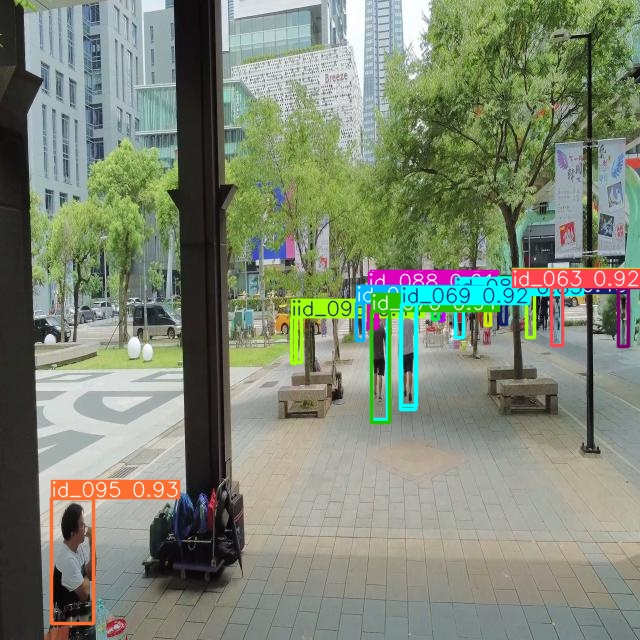

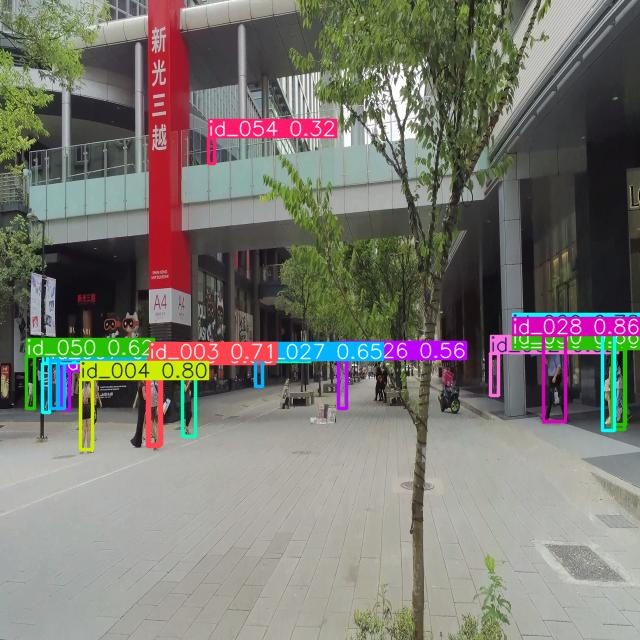

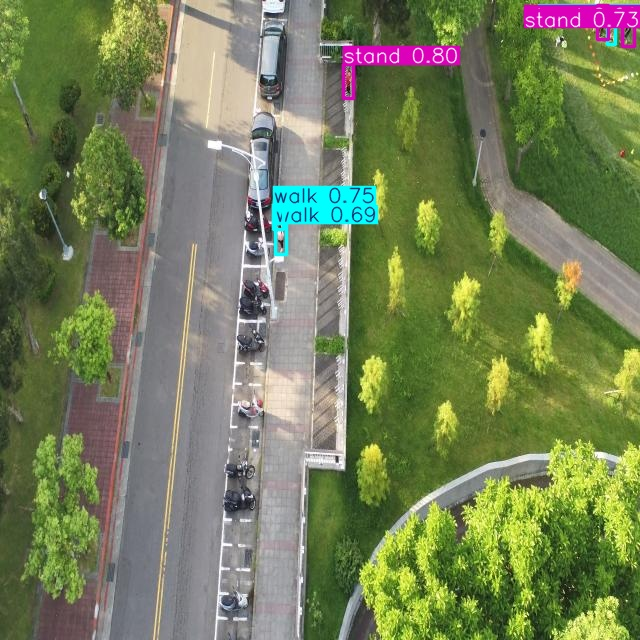

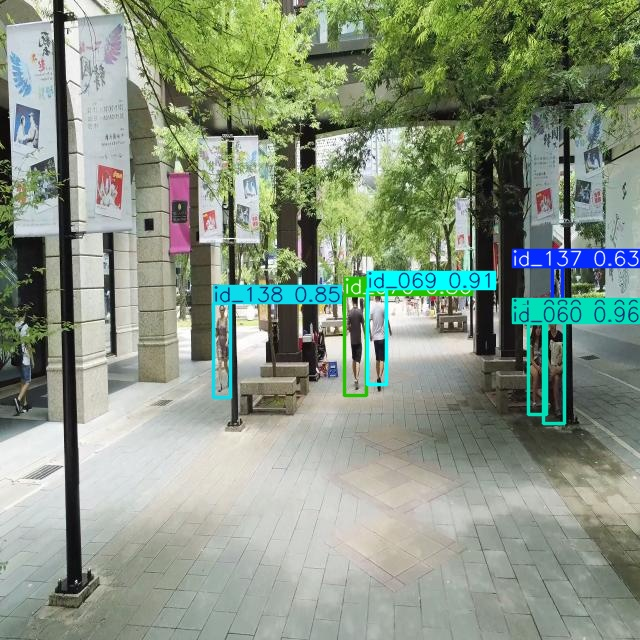

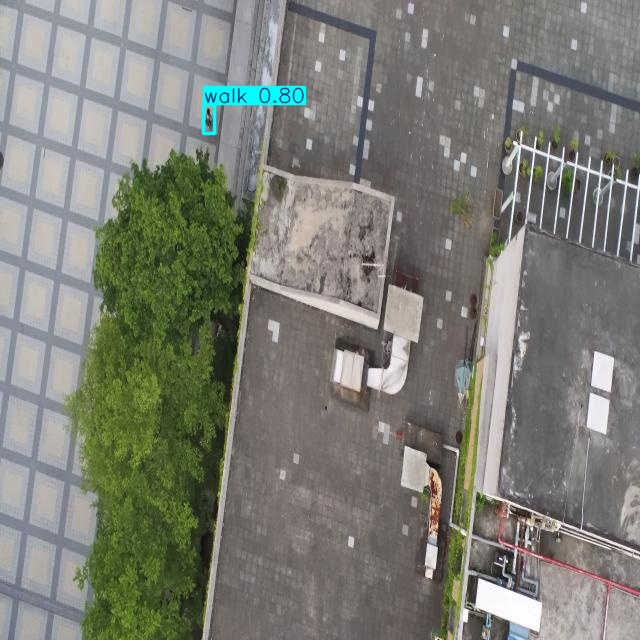

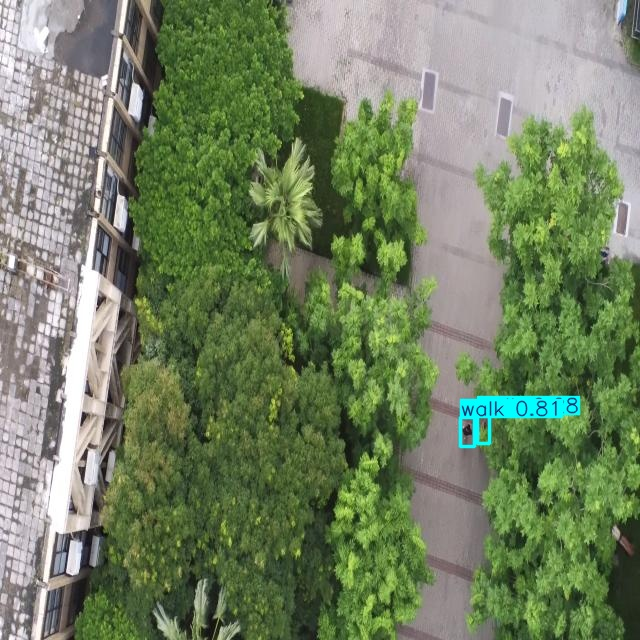

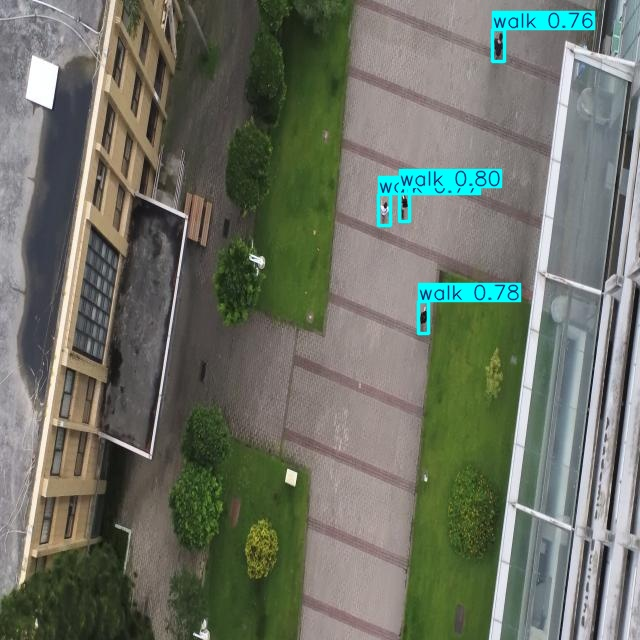

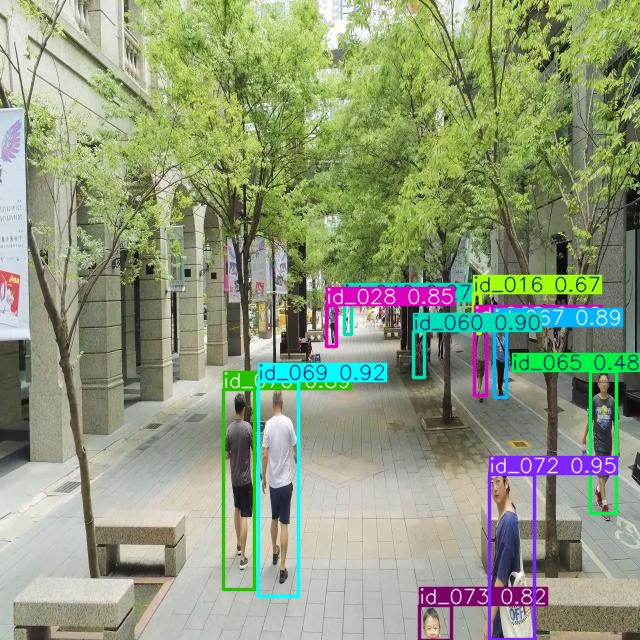

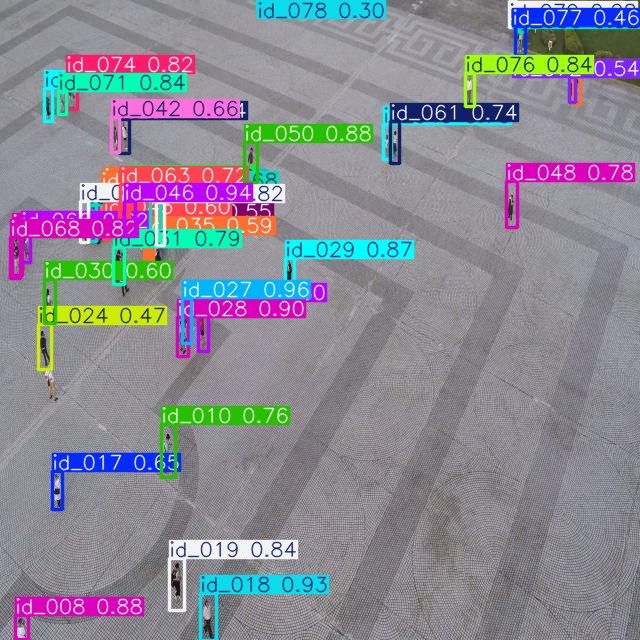

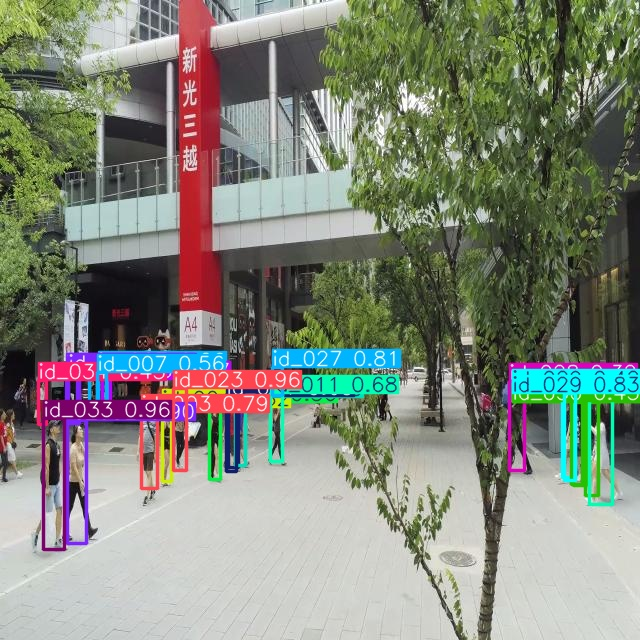

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:10]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!zip -r model.zip /content/runs/detect/train/


  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/train_batch9541.jpg (deflated 3%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 1%)
  adding: content/runs/detect/train/PR_curve.png (deflated 6%)
  adding: content/runs/detect/train/train_batch2.jpg (deflated 1%)
  adding: content/runs/detect/train/val_batch0_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/R_curve.png (deflated 9%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 5%)
  adding: content/runs/detect/train/events.out.tfevents.1732629479.338f02f2288f.1371.0 (deflated 89%)
  adding: content/runs/detect/train/labels.jpg (deflated 26%)
  adding: content/runs/detect/train/results.png (deflated 8%)
  adding: content/runs/detect/train/args.yaml (deflated 53%)
  

In [ ]:
from google.colab import files
files.download('/content/model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>